In [107]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
albers = "+proj=aea +lat_1=29.5 +lat_2=45.5 +lat_0=37.5 +lon_0=-96 +x_0=0 +y_0=0 +ellps=GRS80 +datum=NAD83 +units=m +no_defs +type=crs" # albers equal area projection

In [113]:
world = gpd.read_file('data/world.gpkg')
Canada = world.loc[world['name_long'].isin(['Canada'])].to_crs(albers)
USA = gpd.read_file('data/us_states.gpkg')
NewYork = USA.loc[USA['NAME'].isin(['New York'])].to_crs(albers)
Canada_buffer = Canada.buffer(distance = 10000,resolution = 16)#10千米缓冲区，圆滑度16
envgdf = gpd.GeoDataFrame(geometry=gpd.GeoSeries(Canada_buffer))#转换为GEODF
gdf_left_inte_ritht = gpd.overlay(envgdf,NewYork,'intersection')# 求相交

<AxesSubplot:>

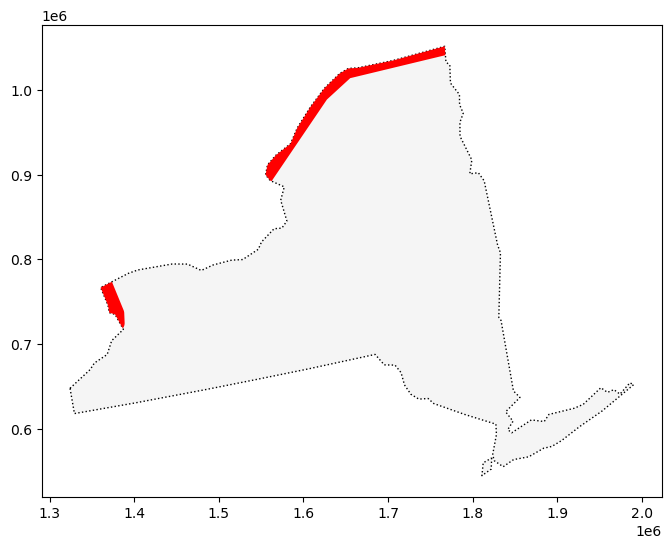

In [114]:
ax = NewYork.plot(figsize=(8,8), color='whitesmoke', linestyle=':', edgecolor='black') #绘图
gdf_left_inte_ritht.plot(markersize=1, color='red',ax=ax)